In [1]:
import os
import sys
import pprint

import pandas as pd
import numpy as np

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 100)

In [18]:
#
# Grab data in pyspark dataframe
#
#stock_input_path = "/Users/seanseamonds/Downloads/AWF_nav_1y.parquet"
#stock_input_path = "/Users/seanseamonds/Downloads/AWF_silver_price_1y.parquet"
#stock_input_path = "../data/cef/price/AWF_5d.parquet"
#stock_input_path = "../data/cef/nav/AWF_1mo.parquet"
stock_input_path = "../data/cef/nav/AWF_5d_cleaned.parquet"

df = pd.read_parquet(stock_input_path)

In [19]:
#
# Quick view, stats, etc
#

#df.head(20)
df.tail(10)
#df.describe()
#df.dtypes
#df.count()
#df.nav.mean()

,closing_nav,closing_price
Date,,
2024-12-31,11.35,10.73
2025-01-02,11.30,10.71
2025-01-03,11.31,10.76
2025-01-06,11.33,10.72


In [154]:
#
# Pandas plotting setup
#
pd.options.plotting.backend = 'matplotlib'
pd.set_option('plotting.backend', 'matplotlib')

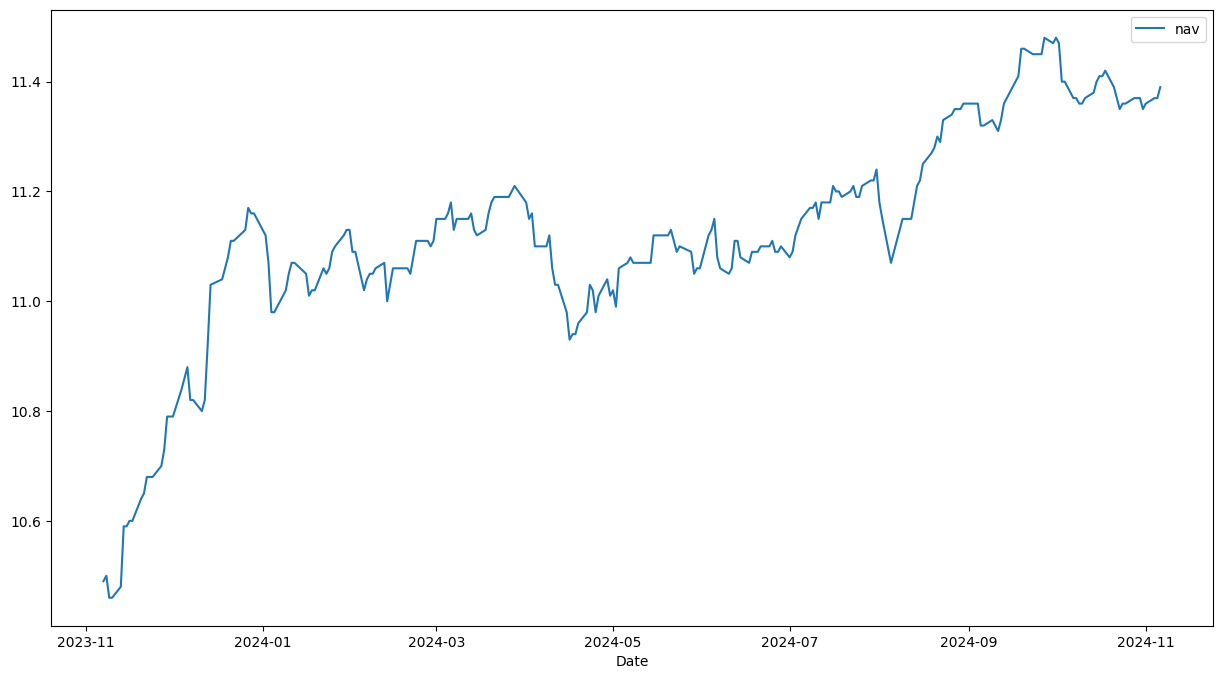

In [175]:
#
# Line graph columns over time
#
cols_to_plot = ['nav']

df_plot = df[cols_to_plot]

# axs is a numpy.ndarray of matplotlib.axes._axes.Axes
fig, axs = plt.subplots(1)

# figure level settings
fig.set_size_inches((15, 8))

plt.xlabel('Date')

axs.plot(df_plot.index, 
         df_plot[cols_to_plot]
)
axs.legend(cols_to_plot)

In [78]:
full_path = "data/nav/AWF_max_historical.csv"
def get_prefix_from_full_path(full_path):
    full_path_list = full_path.split("/")
    return full_path_list[len(full_path_list)-2]

get_prefix_from_full_path(

'nav'

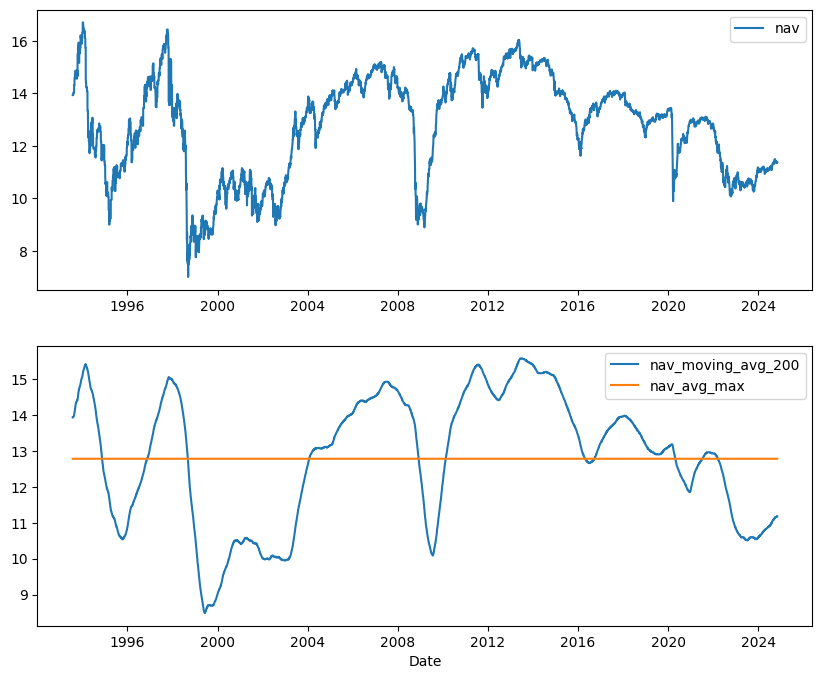

In [12]:
#
# plot multiple combos of columns, side by side for comparison
#

# specify number of subplots, allows to refer to them in an indexed manner
fig, axs = plt.subplots(2)

# set x label once as it's the same values/range
plt.xlabel('Date')

# figure level settings
fig.set_size_inches((10, 8))

# Using plt.plot() seems to keep previous info, It was values from both datasets on the same axis
# Using axs seems to treat each subplot separately, but also seems to look at the overall range 
#   of all the data sets in building it's Y axis

# Plot 1
plot_cols = ['nav']
axs[0].plot(df.index, df[plot_cols]
)
axs[0].legend(plot_cols)

# Plot 2
plot_cols = ['nav_moving_avg_200', 'nav_avg_max']
axs[1].plot(df.index, df[plot_cols]
)
axs[1].legend(plot_cols)

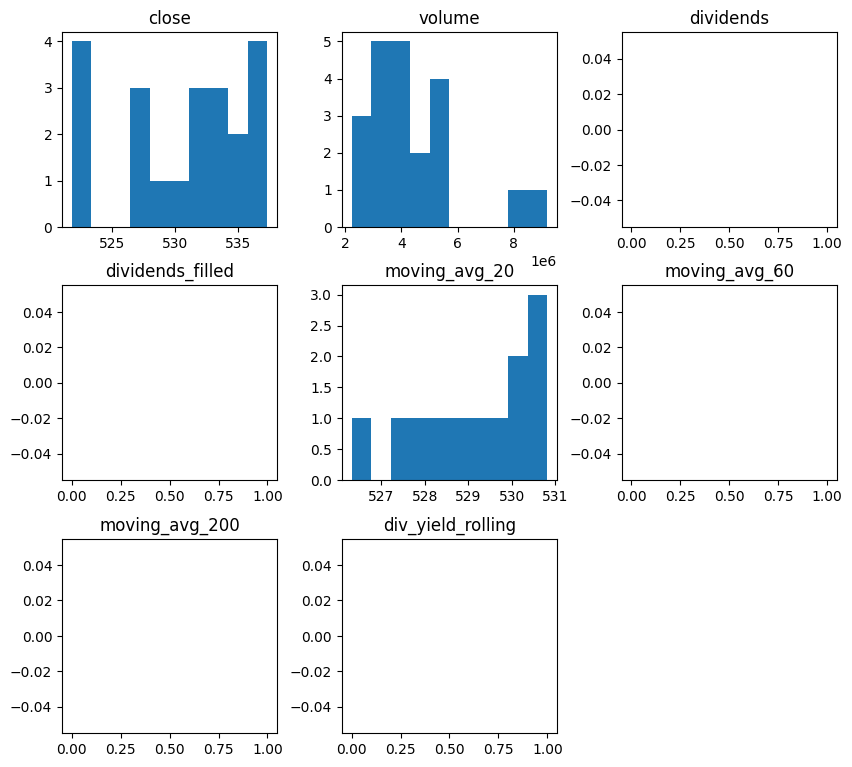

In [46]:
#
# Histograms
#

# ";" here keeps extraneous info from printing
df.hist(grid=False, layout=(20,3), figsize=(10,65));

<Axes: >

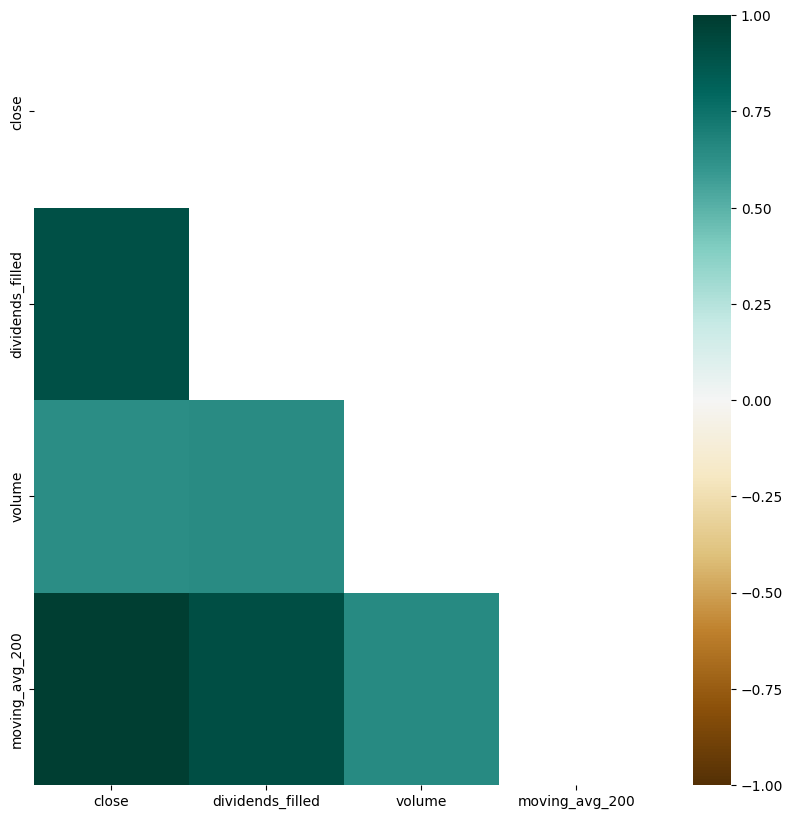

In [21]:
#
# Correlation matrix
#
cols_to_correlate = ['close', 'dividends_filled', 'volume', 'moving_avg_200']

corr = df[cols_to_correlate].corr()

# Generate a mask to avoid showing the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='BrBG', vmin=-1, vmax=1)